## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 넘파이, 시각화, 통계
- 평가일 : 24.1.22
- 성명 : 한정현
- 점수 :

In [1]:
# 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1. array2d에서 슬라이싱을 사용해서 아래와 같이 출력하세요.

array2d = np.arange(1,10).reshape(3,3)

In [ ]:
[[1 2 3]
[4 5 6]
[7 8 9]]

[[2 3]
[5 6]]

[1 4]

In [4]:
import numpy as np
array2d = np.arange(1,10).reshape(3,3)
print(array2d[:,:])
print(array2d[0:2,1:3])
print(array2d[0:2,0])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[2 3]
 [5 6]]
[1 4]


In [ ]:
# Q1 솔루션
import numpy as np
array2d = np.arange(1,10).reshape(3,3)
# print(array2d)

print(array2d[:,:],'\n')
print(array2d[0:2, 1:3],'\n')
print(array2d[0:2,0])

# 다른 솔루션
print(array2d[:2,:1].reshape(-1))

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[2 3]
 [5 6]] 

[1 4]
[1 4]


Q2. 1 ~ 100까지 정수에서 5의 배수이면서 2의 배수인 것만을 출력(for문과 배열 두가지 방식)

In [8]:
li = []
for i in range(1,101):
  if (i % 5 == 0) and (i % 2 ==0):
    li.append(i)
print(li)

ar100 = np.arange(1,101)
newar = ar100[(ar100 % 5 == 0) & (ar100 % 2 == 0)]
newar

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [ ]:
# Q2 솔루션
import numpy as np
ar100 = np.arange(1,101)

sol1 = ar100[(ar100 % 5 == 0) & (ar100 % 2 == 0)]
print(sol1)

li = []
for i in range(1,101):
  if (i % 5 == 0 ) and (i % 2 == 0 ) :
    li.append(i)
print(li)

[ 10  20  30  40  50  60  70  80  90 100]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


Q3. 주가데이터.csv를 불러와서 다음을 수행하세요.
- 아래 df에서 Close 칼럼을 Box Plot으로 표현하세요
- df Close 칼럼의 값에서 이상치로 의심할 수 있는 관측치를 출력하세요.

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
df.describe()

,Date,Close,Start,High,Low,Volume
11,2018-06-15,13400,13600,13600,12900,201376
12,2018-06-14,13450,13200,13700,13150,347451


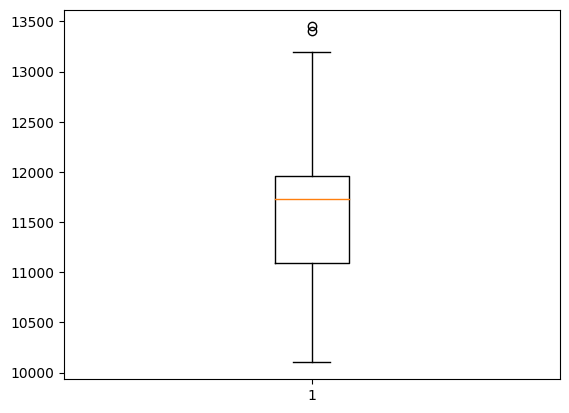

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(df.Close)
q1 = df.Close.describe()['25%']
q3 = df.Close.describe()['75%']
IQR = q3 - q1
result = df[(df.Close < q1 - 1.5*IQR) | (df.Close > q3 + 1.5*IQR)]
result

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['Close'])
q1 = df['Close'].describe()['25%']
q3 = df['Close'].describe()['75%']
IQR = q3 - q1
result = df[(df['Close'] < q1 - 1.5*IQR) | (df['Close'] > q3 + 1.5*IQR)]
print(result)

Q4. fish_multi A, B 그룹에 이상치를 10, 2를 추가한 후 Box Plot을 그리고 이상치를 구하세요.


In [14]:
import pandas as pd
fish_multi = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


  species  length
5       A      10
   species  length
10       B       2


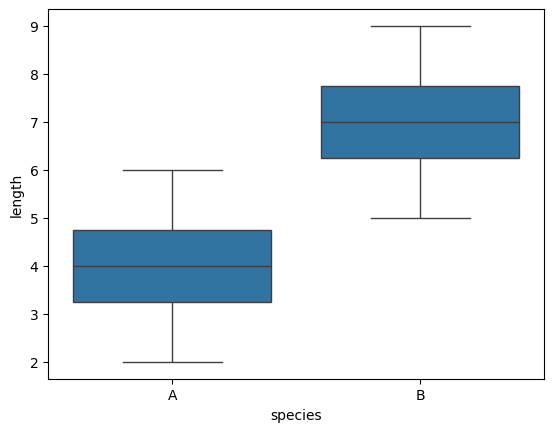

In [15]:
import seaborn as sns
sns.boxplot(x='species', y='length', data=fish_multi)
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2

for i in fish_multi.species.unique():
  group = fish_multi[fish_multi.species == i]

  q1 = group.length.describe()['25%']
  q3 = group.length.describe()['75%']
  IQR = q3 - q1
  result = group[(group.length < q1 - IQR*1.5) | (group.length > q3 + IQR*1.5)]
  print(result)

In [ ]:
import seaborn as sns
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2

sns.boxplot(x='species', y='length', data=fish_multi)

for i in fish_multi['species'].unique():
  group = fish_multi[fish_multi['species']== i]

  q1 = group['length'].quantile(0.25)
  q3 = group['length'].quantile(0.75)
  IQR = q3 - q1

  result = group[(group['length'] < q1 - 1.5*IQR) | (group['length'] > q3 + 1.5*IQR)]
  print(result)

Q5. 적절한 데이터를 생성하여 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.

<BarContainer object of 10 artists>

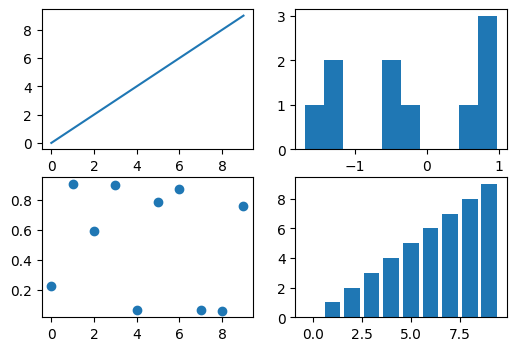

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,4))
g1 = plt.subplot(2,2,1)
plt.plot(np.arange(10))
g2 = plt.subplot(2,2,2)
plt.hist(np.random.randn(10), bins=10)
g3 = plt.subplot(2,2,3)
plt.scatter(np.arange(10), np.random.rand(10))
g4 = plt.subplot(2,2,4)
plt.bar(np.arange(10), np.arange(10))

In [ ]:
g1 = sub_plot(2,2,1)import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,6))

g1 = fig.add_subplot(2,2,1)
g2 = fig.add_subplot(2,2,2)
g3 = fig.add_subplot(2,2,3)
g4 = fig.add_subplot(2,2,4)

g1.plot(np.arange(20), np.random.randn(20))
g2.hist(np.random.randn(1000),bins=10)
g3.scatter(x=np.arange(10), y=np.random.randn(10))
g4.bar(np.arange(10), np.random.randint(7,77,10))

Q6. 정규 분포를 따르는 아래 데이터를 생성한 후 과제를 수행하세요.

data = stats.norm.rvs(loc=172.5, scale=6, size=10000)

- 생성된 데이터를 사용하여 히스토그램 작성
- 히스토그램의 빈(bin) 수를 조정해서 작성
- 두개의 그래프를 1행 2열로 표현

(array([   7.,  115.,  589., 1684., 2865., 2781., 1492.,  397.,   65.,
           5.]),
 array([149.48002512, 154.18371207, 158.88739903, 163.59108598,
        168.29477294, 172.9984599 , 177.70214685, 182.40583381,
        187.10952076, 191.81320772, 196.51689468]),
 <BarContainer object of 10 artists>)

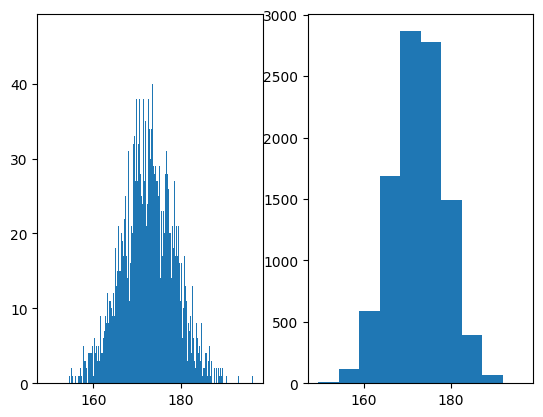

In [34]:
from scipy import stats
data = stats.norm.rvs(loc=172.5, scale=6, size=10000)
plt.subplot(1,2,1)
plt.hist(data,bins=1000)
plt.subplot(1,2,2)
plt.hist(data, bins=10)

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

data = stats.norm.rvs(loc=172.5, scale=6, size=10000)
fig,axes = plt.subplots(1,2, figsize=(10,8))
axes[0].hist(data, bins=10)
axes[1].hist(data, bins=50)

Q7. 주어진 숫자 배열(예: [4, 8, 15, 16, 23, 42])에 대해 평균과 중앙값을 계산한 후 배열에 두 개의 극단값을 추가한 후(예: -100, 100), 다시 평균과 중앙값을 계산하고 비교하세요.

In [38]:
ar = [4, 8, 15, 16, 23, 42]
print(np.mean(ar))
print(np.median(ar))

newar = np.append(ar, [-100,100])
print(np.mean(newar))
print(np.median(newar))

18.0
15.5
13.5
15.5


In [37]:
data =  [4, 8, 15, 16, 23, 42]
print(np.mean(data))
print(np.median(data))

newdata = np.append(data, [-100, 100])
print(np.mean(newdata))
print(np.median(newdata))

18.0
15.5
13.5
15.5


Q8. 아래 두개의 데이터로 공분산(covariance)과 상관계수를 계산하세요.
- data1 = [65, 72, 78, 65, 72, 70, 65, 68]
- data2 = [72, 69, 74, 66, 70, 75, 65, 72]

In [40]:
data1 = [65, 72, 78, 65, 72, 70, 65, 68]
data2 = [72, 69, 74, 66, 70, 75, 65, 72]
print(np.corrcoef(data1,data2)[0,1])

0.5453950193321363


Q9. 주어진 데이터 배열의 사분위수(제1사분위수, 중앙값, 제3사분위수)를 계산한 후 데이터의 10번째 백분위수와 90번째 백분위수를 계산하여 출력하세요.
- data = np.arange(1000)

In [ ]:
data = np.arange(1000)
quar = np.percentile(data, [25,50,75])
qct10 = np.percentile(data, 10)
qct90 = np.percentile(data, 90)

quar, qct10, qct90

(array([249.75, 499.5 , 749.25]), 99.9, 899.1)

Q10. Z-점수 정규화를 사용하여 주어진 데이터 배열을 표준화하세요.(평균이 0이고 분산이 1이 되도록 특성의 크기를 조정)
- data = np.array([[1], [2], [3], [4], [5]])

In [ ]:
data = np.array([[1], [2], [3], [4], [5]])
z = (data - np.mean(data)) / np.std(data)
zdata-np.mean(data) / np.d

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])